# Introduction

Getting an idea of what the world is looking gives a glimpse to marketers on how to target their products. The same can also be used to find how the world looks forward to various different events.

All search engines have one or the other way to extract the trend analysis, and Google which has [88.14%](https://www.statista.com/statistics/216573/worldwide-market-share-of-search-engines/) of search volume has a public trend analysis tool.


Let's extract the trends for New Year and Christmas for the whole world and dive deeper.

In [1]:
#Importing required libararies for analysis
import numpy as np
import pandas as pd

data_ww_csv = "https://raw.githubusercontent.com/anvsh/Christmas-vs-New_Year/analysis/data/christmas-vs-newyear-worldwide.csv"
data_ww = pd.read_csv(data_ww_csv)
data_ww.columns = ["Month","Christmas","New_Year"]
data_ww.head()

,Month,Christmas,New_Year
0,2004-01,5,16
1,2004-02,2,1
2,2004-03,2,1
3,2004-04,2,1
4,2004-05,2,<1


Google trends data referred above is **normalized non-real time**. This normalization of data allows us to know how popular a search term was compared to all searches on all topics. 

As we can see, New Year is more searched during the first month of the year compared to Christmas. Even though the year has changed, the Christmas cheer doesn't seems to give away completely.

Let's clean the data before we infer further.

In [2]:
# Replacing search volume <1 to 0
data_ww.replace(to_replace="<1", value="0", inplace = True)

# Changing type of New Year column to int
data_ww = data_ww.astype({"Month":object,"Christmas":int,"New_Year":int})
data_ww.dtypes

Month        object
Christmas     int64
New_Year      int64
dtype: object

In [3]:
data_ww.Month = pd.to_datetime(data_ww.Month+"-01", yearfirst= True)

# Visualize

With data clean and ready, we can go ahead and see the trends of Christmas and New Year searches.

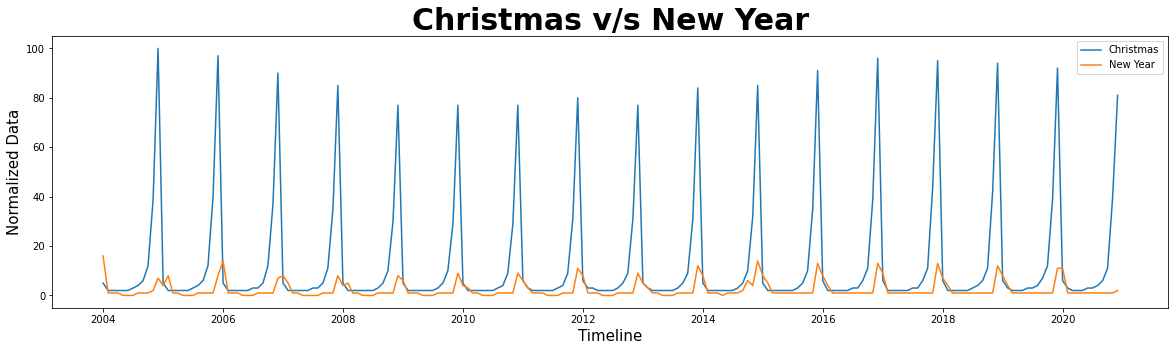

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

sns.lineplot(x="Month", y="Christmas", data=data_ww, label= "Christmas")
sns.lineplot(x="Month", y="New_Year", data=data_ww, label="New Year")
plt.title("Christmas v/s New Year",{"fontsize":30, "fontweight": "bold"})
plt.xlabel("Timeline",{"fontsize":15})
plt.ylabel("Normalized Data",{"fontsize":15})
plt.show()